In [127]:
import gc
import multiprocessing
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import warnings
from scipy.stats import boxcox
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as prfs
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score

In [128]:
df = pd.read_csv("../../curated-data/ModelData_SR50.csv")
df.head(5)

,NASA,TA,EXT,AGR,CS,NT,OP,AV,EM,Task,...,NP,FA,SR,AP,AR,DWH,DWR,T,DS,Rank
0,24,38,2,8,10,3,8,16,17,26,...,2,1,1,2,4,2,70,1,1,2
1,17,35,6,9,7,4,8,25,14,31,...,2,1,1,2,5,2,70,1,1,1
2,20,38,8,8,6,5,7,19,22,29,...,1,2,0,2,4,2,90,2,2,0
3,16,54,3,7,3,9,6,23,24,16,...,2,1,0,2,2,2,60,1,2,0
4,18,28,6,4,10,3,8,13,12,35,...,1,2,0,2,5,1,60,2,1,2


In [129]:
# BFI_List = ['EXT', 'AGR', 'CS', 'NT', 'OP']
# df["BFI_SUM"] = df[BFI_List].sum(axis=1)

# CISS_List = ['AV', 'EM', 'Task']
# df["CISS_SUM"] = df[CISS_List].sum(axis=1)

In [130]:
# df = df.drop(columns=['EXT', 'AGR', 'CS', 'NT', 'OP', 'AV', 'EM', 'Task'])

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   NASA    399 non-null    int64
 1   TA      399 non-null    int64
 2   EXT     399 non-null    int64
 3   AGR     399 non-null    int64
 4   CS      399 non-null    int64
 5   NT      399 non-null    int64
 6   OP      399 non-null    int64
 7   AV      399 non-null    int64
 8   EM      399 non-null    int64
 9   Task    399 non-null    int64
 10  H       399 non-null    int64
 11  RS      399 non-null    int64
 12  WH      399 non-null    int64
 13  TWR     399 non-null    int64
 14  BR      399 non-null    int64
 15  NP      399 non-null    int64
 16  FA      399 non-null    int64
 17  SR      399 non-null    int64
 18  AP      399 non-null    int64
 19  AR      399 non-null    int64
 20  DWH     399 non-null    int64
 21  DWR     399 non-null    int64
 22  T       399 non-null    int64
 23  DS      399 non

<AxesSubplot:>

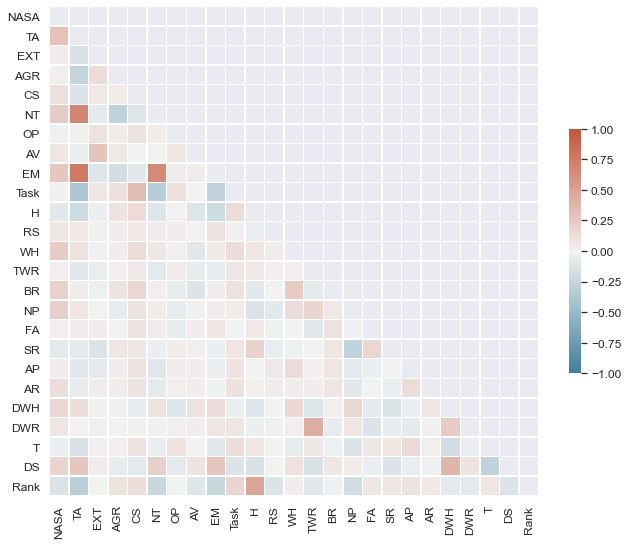

In [132]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [133]:
from scipy import stats

# df['TWR'],fitted_lambda = stats.boxcox(df['TWR'] + .01)
# df['DWR'],fitted_lambda = stats.boxcox(df['DWR'] + .01)
# df['CS'], lmbda = boxcox(df['CS'], lmbda=None)
# df['OP'], lmbda = boxcox(df['OP'], lmbda=None)
# df['Task'], lmbda = boxcox(df['Task'], lmbda=None)
# df['AR'],fitted_lambda = stats.boxcox(df['AR'] + .01)

In [134]:
# print('Distributions of all columns')
# plt.figure(figsize=(30, 30))
# for i, col in enumerate(list(df.columns)[0:24]):
#     if i < 12:
#         plt.subplot(8, 3, i + 1)
#         sns.distplot(df[col], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
#         plt.xlabel(df.columns[i], fontsize=14, fontweight='bold')

In [135]:
# df['TWR'] = np.log(df['TWR'] + 0.001) 
# df['DWR'] = np.log(df['DWR'] + 0.001) 

In [136]:
# print('Distributions of all columns')
# plt.figure(figsize=(30, 30))
# for i, col in enumerate((df.columns)[0:24]):
# # for i in range(12:24):
# #     print(i)
#     if i > 11:
#         plt.subplot(8, 3, i + 1)
#         sns.distplot(df[col],  hist = True, kde = False)
#         plt.xlabel(df.columns[i], fontsize=14, fontweight='bold')

In [137]:

# df['TWR'], lmbda = boxcox(df['TWR'], lmbda=None)
# df['DWR'], lmbda = boxcox(df['DWR'], lmbda=None)

In [138]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['SR']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

X_train = strat_train_set.drop('SR', axis=1)
Y_train = strat_train_set['SR'].copy()

X_test = strat_test_set.drop('SR', axis=1)
Y_test = strat_test_set['SR'].copy()

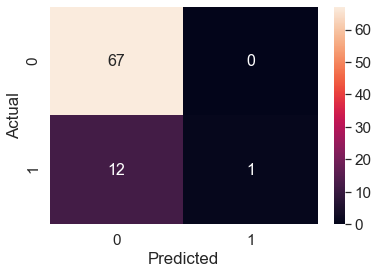

Wall time: 3.17 s


In [139]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1600, max_features = 'auto', bootstrap = True)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
y_score = rf.predict_proba(X_test)
conf_mat = pd.DataFrame(confusion_matrix(Y_test, y_pred))
sns.set(font_scale=1.4) # for label size
plot = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}) # font size
plot.set(xlabel='Predicted', ylabel='Actual')
plt.show()

In [140]:
print("Accuracy: ", accuracy_score(Y_test, y_pred))
print("Precision: ", precision_score(Y_test, y_pred))
print("Recall: ", recall_score(Y_test, y_pred))
print("F1: ", f1_score(Y_test, y_pred))
print("Auc Score: ", roc_auc_score(Y_test, y_score[:,1]))

Accuracy:  0.85
Precision:  1.0
Recall:  0.07692307692307693
F1:  0.14285714285714288
Auc Score:  0.661308840413318


In [141]:
df_feature_importance = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance

,feature importance
H,0.126739
NASA,0.060515
TA,0.060086
EM,0.059783
AV,0.058156
NP,0.055517
FA,0.054551
EXT,0.052895
DWR,0.050319
TWR,0.048926


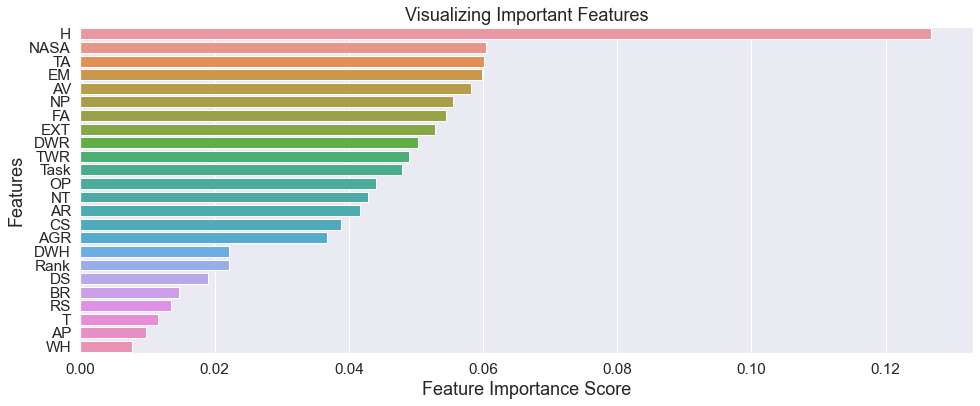

In [142]:
%matplotlib inline
feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
# Creating a bar plot
plt.figure(figsize=(16, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize=18)
plt.ylabel('Features', fontsize=18)
plt.title("Visualizing Important Features", fontsize=18)
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
# plt.legend()
plt.show()

In [143]:
result_df = X_test
result_df['actual'] = Y_test
result_df['prediction'] = y_pred        
result_df.to_csv('../modeling-result/result_df.csv', index=False)

In [144]:
result_df = result_df[result_df.actual != 0 ]
result_df

,NASA,TA,EXT,AGR,CS,NT,OP,AV,EM,Task,...,FA,AP,AR,DWH,DWR,T,DS,Rank,actual,prediction
284,19,37,4,10,5,4,10,10,16,24,...,2,1,1,2,70,2,2,2,1,0
159,21,30,7,9,10,5,9,14,14,29,...,2,2,5,2,60,1,2,2,1,0
253,21,24,6,10,9,2,8,22,8,29,...,1,2,3,2,90,2,2,2,1,0
394,21,48,4,5,8,7,5,26,18,30,...,1,2,2,2,40,2,1,2,1,0
268,17,31,6,6,10,3,10,18,10,32,...,2,2,3,2,80,2,2,1,1,0
51,28,48,6,7,8,8,7,15,22,21,...,4,1,2,2,10,1,2,1,1,0
212,18,48,4,7,8,10,7,13,24,27,...,6,2,2,2,50,2,2,2,1,0
265,35,55,7,9,10,7,9,19,25,32,...,1,2,5,2,90,2,2,2,1,0
1,17,35,6,9,7,4,8,25,14,31,...,1,2,5,2,70,1,1,1,1,0
260,23,44,4,9,6,6,6,20,23,27,...,1,2,1,2,70,2,2,2,1,0


In [145]:
# plt.figure(figsize=(30, 30))
# for i, col in enumerate(list(result_df.columns)[0:23]):
#     if i < 12:
#         plt.subplot(8, 3, i + 1)
#         sns.distplot(result_df[col], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
#         plt.xlabel(result_df.columns[i], fontsize=14, fontweight='bold')

In [146]:
# print('Distributions of all columns')
# plt.figure(figsize=(30, 30))
# for i, col in enumerate((result_df.columns)[0:24]):
# # for i in range(12:24):
# #     print(i)
#     if i > 11:
#         plt.subplot(8, 3, i + 1)
#         sns.distplot(result_df[col],  hist = True, kde = False)
#         plt.xlabel(result_df.columns[i], fontsize=14, fontweight='bold')

In [147]:
# df_buffered = df[['CISS_SUM', 'H', 'TA', 'NASA', 'NP', 'BFI_SUM', 'DWR', 'TWR', 'AR', 'FA', 'Rank', 'DWH', 'SR']].copy()
# df_buffered

In [148]:
# df_buffered = df[['H', 'TA', 'NP', 'EM', 'NASA', 'AV', 'Task', 'DWR', 'EXT', 'NT', 'TWR', 'AR', 'FA', 'AGR', 'OP', 'CS', 'SR']].copy()
# df_buffered

In [149]:
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(df_buffered, df['SR']):
#     strat_train_set = df_buffered.loc[train_index]
#     strat_test_set = df_buffered.loc[test_index]

# X_train = strat_train_set.drop('SR', axis=1)
# Y_train = strat_train_set['SR'].copy()

# X_test = strat_test_set.drop('SR', axis=1)
# Y_test = strat_test_set['SR'].copy()

In [150]:
# %%time
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_estimators = 2000,
#                                    max_features = 'auto',
#                                    bootstrap = True)
# rf.fit(X_train, Y_train)
# y_pred = rf.predict(X_test)
# y_score = rf.predict_proba(X_test)
# conf_mat = pd.DataFrame(confusion_matrix(Y_test, y_pred))
# sns.set(font_scale=1.4) # for label size
# plot = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}) # font size
# plot.set(xlabel='Predicted', ylabel='Actual')
# plt.show()

In [151]:
# print("Accuracy: ", accuracy_score(Y_test, y_pred))
# print("Precision: ", precision_score(Y_test, y_pred))
# print("Recall: ", recall_score(Y_test, y_pred))
# print("F1: ", f1_score(Y_test, y_pred))
# print("Auc Score: ", roc_auc_score(Y_test, y_score[:,1]))

In [152]:
# result_df = X_test
# result_df['actual'] = Y_test
# result_df['prediction'] = y_pred          
# result_df.to_csv('modeling-result/result_df.csv', index=False)

In [153]:
# df_feature_importance = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
# df_feature_importance

In [154]:
# %matplotlib inline
# feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
# # Creating a bar plot
# plt.figure(figsize=(16, 6))
# sns.barplot(x=feature_imp, y=feature_imp.index)
# # Add labels to your graph
# plt.xlabel('Feature Importance Score', fontsize=18)
# plt.ylabel('Features', fontsize=18)
# plt.title("Visualizing Important Features", fontsize=18)
# plt.rc('xtick',labelsize=12)
# plt.rc('ytick',labelsize=12)
# # plt.legend()
# plt.show()

In [155]:

df_buffered = df[['NP', 'FA', 'H', 'EXT', 'Task', 'BR', 'DS', 'AV', 'AR', 'SR']].copy()
df_buffered.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   NP      399 non-null    int64
 1   FA      399 non-null    int64
 2   H       399 non-null    int64
 3   EXT     399 non-null    int64
 4   Task    399 non-null    int64
 5   BR      399 non-null    int64
 6   DS      399 non-null    int64
 7   AV      399 non-null    int64
 8   AR      399 non-null    int64
 9   SR      399 non-null    int64
dtypes: int64(10)
memory usage: 31.3 KB


In [156]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_buffered[['H', 'EXT', 'Task', 'AV']] = scaler.fit_transform(df_buffered[['H', 'EXT', 'Task', 'AV']])
df_buffered

,NP,FA,H,EXT,Task,BR,DS,AV,AR,SR
0,2,1,0.198980,0.000,0.678571,2,1,0.346154,4,1
1,2,1,0.117347,0.500,0.857143,2,1,0.692308,5,1
2,1,2,0.066327,0.750,0.785714,1,2,0.461538,4,0
3,2,1,0.076531,0.125,0.321429,1,2,0.615385,2,0
4,1,2,0.295918,0.500,1.000000,1,1,0.230769,5,0
...,...,...,...,...,...,...,...,...,...,...
394,1,1,0.132653,0.250,0.821429,2,1,0.730769,2,1
395,1,2,0.545918,0.750,0.928571,2,1,0.538462,3,1
396,2,1,0.122449,0.750,0.535714,2,2,0.000000,4,0
397,3,1,0.117347,0.500,0.714286,1,1,0.346154,5,0


<AxesSubplot:>

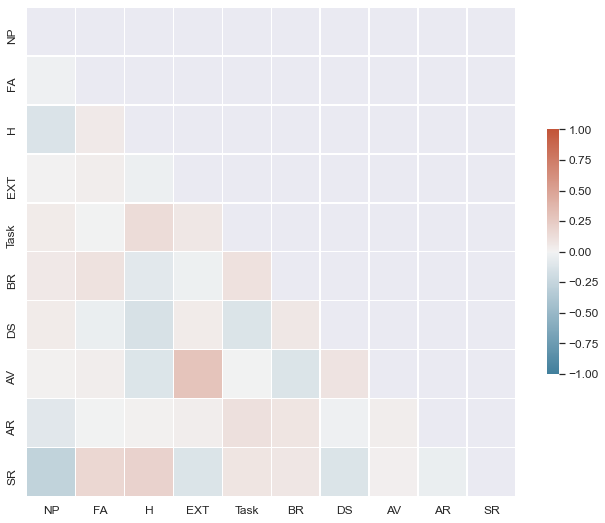

In [157]:
corr = df_buffered.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [158]:
# df_buffered = df_buffered.astype("category")
# df_buffered.info()
# df_buffered['H'] = df_buffered['H'].astype("float64")
# df_buffered.info()

In [159]:
# df_buffered.FA.value_counts()

In [160]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_buffered, df['SR']):
    strat_train_set = df_buffered.loc[train_index]
    strat_test_set = df_buffered.loc[test_index]

X_train = strat_train_set.drop('SR', axis=1)
Y_train = strat_train_set['SR'].copy()

X_test = strat_test_set.drop('SR', axis=1)
Y_test = strat_test_set['SR'].copy()

In [161]:
Y_test

65     0
329    0
398    0
64     0
316    0
      ..
348    0
283    0
330    1
92     1
3      0
Name: SR, Length: 80, dtype: int64

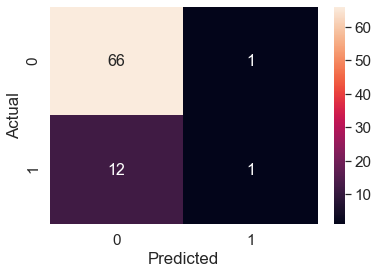

Wall time: 2.76 s


In [162]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 2000,
                                   max_features = 'auto',
                                   bootstrap = True)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
y_score = rf.predict_proba(X_test)
conf_mat = pd.DataFrame(confusion_matrix(Y_test, y_pred))
sns.set(font_scale=1.4) # for label size
plot = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}) # font size
plot.set(xlabel='Predicted', ylabel='Actual')
plt.show()

In [163]:
print("Accuracy: ", accuracy_score(Y_test, y_pred))
print("Precision: ", precision_score(Y_test, y_pred))
print("Recall: ", recall_score(Y_test, y_pred))
print("F1: ", f1_score(Y_test, y_pred))
print("Auc Score: ", roc_auc_score(Y_test, y_score[:,1]))

Accuracy:  0.8375
Precision:  0.5
Recall:  0.07692307692307693
F1:  0.13333333333333336
Auc Score:  0.6463834672789897


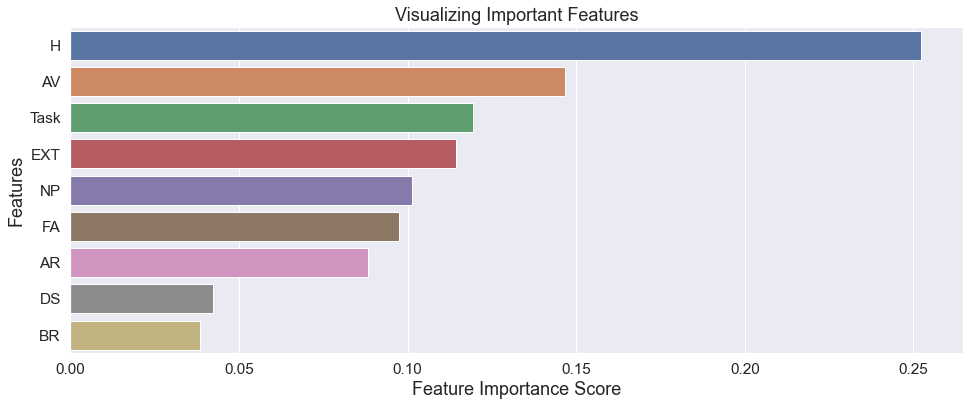

In [164]:
%matplotlib inline
feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
# Creating a bar plot
plt.figure(figsize=(16, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize=18)
plt.ylabel('Features', fontsize=18)
plt.title("Visualizing Important Features", fontsize=18)
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
# plt.legend()
plt.show()

In [165]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error

R^2 score: -0.19
MAE score: 0.16
EVS score: -0.06


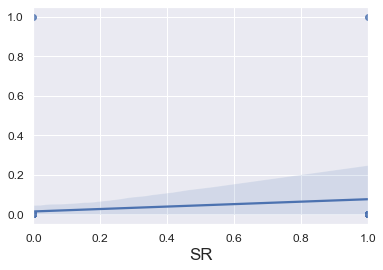

In [166]:
predictions = rf.predict(X_test)
print(f'R^2 score: {r2_score(y_true=Y_test, y_pred=predictions):.2f}')
print(f'MAE score: {mean_absolute_error(y_true=Y_test, y_pred=predictions):.2f}')
print(f'EVS score: {explained_variance_score(y_true=Y_test, y_pred=predictions):.2f}')
rp = sns.regplot(x=Y_test, y=predictions)

In [167]:
import pickle
with open('proposal_rf.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [168]:
# rf.predict([[2, 20, 2]])